In [37]:
# importing necessary libraries
import numpy as np
import cv2
from matplotlib import pyplot as plt


In [38]:
def show_result(data):
    plt.imshow(data)
    return plt.show()

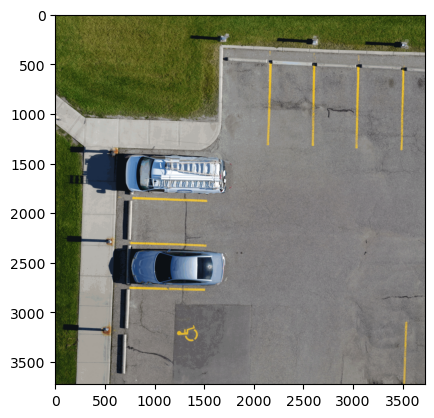

In [39]:

# read a cracked sample image
img = cv2.imread('Input-Set/Lot1.tif')
# added to turn color back to normal
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
show_result(img)
#cv2.imshow("Dispaly Window", img)


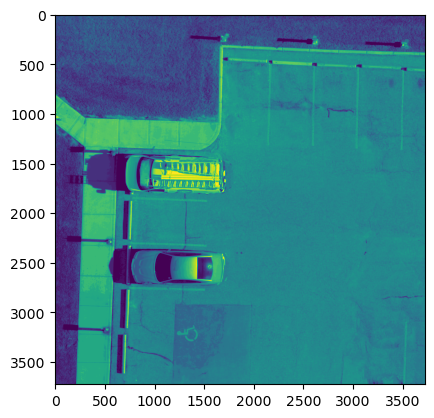

In [40]:

# Convert into gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show_result(gray)
#cv2.cvtColor?

In [41]:

# Image processing ( smoothing )
# Averaging
blur = cv2.blur(gray,(3,3))
#show_result(blur)


In [42]:
# Apply logarithmic transform
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255


<ipython-input-42-1052ca9763d6>:2: RuntimeWarning: divide by zero encountered in log
  img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255


In [43]:

# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
#show_result(img_log)


In [ ]:

# Image smoothing: bilateral filter
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)
show_result(bilateral)


In [ ]:

# Canny Edge Detection
edges = cv2.Canny(bilateral,100,200)
#show_result(edges)


In [ ]:

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

In [ ]:
#show_result(blur)
# Apply logarithmic transform
img_log = (np.log(blur+1)/(np.log(1+np.max(blur))))*255


In [ ]:

# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
#show_result(img_log)


In [ ]:

# Image smoothing: bilateral filter
bilateral = cv2.bilateralFilter(img_log, 5, 75, 75)
#show_result(bilateral)


In [ ]:

# Canny Edge Detection
edges = cv2.Canny(bilateral,100,200)
#show_result(edges)


In [ ]:

# Morphological Closing Operator
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

In [29]:

# Create feature detecting method
# sift = cv2.xfeatures2d.SIFT_create()
# surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)


In [30]:

# Make featured Image
keypoints, descriptors = orb.detectAndCompute(closing, None)
featuredImg = cv2.drawKeypoints(closing, keypoints, None)


In [31]:

# Create an output image
cv2.imwrite('Output-Set/Detected_Lot1.tif', featuredImg)


True

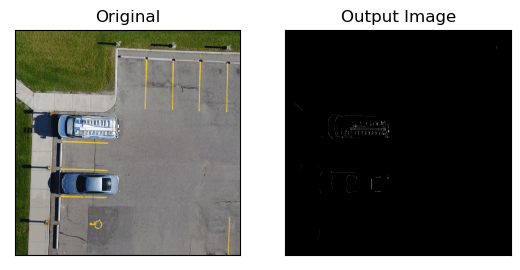

In [32]:

# Use plot to show original and output image
plt.subplot(121),plt.imshow(img)
plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(featuredImg,cmap='gray')
plt.title('Output Image'),plt.xticks([]), plt.yticks([])
plt.show()
